<a href="https://colab.research.google.com/github/abs711/Data-Analysis/blob/main/Classifying_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import MNIST from open ML

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive

# the following command loads up your google drive. It will promp you to give Colab access to your Gdrive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_to_train = '/content/drive/My Drive/AMATH 582/Ass2/MNIST_training_set.npy'
path_to_test = '/content/drive/My Drive/AMATH 582/Ass2/MNIST_test_set.npy'

d_train = np.load(path_to_train, allow_pickle=True)
d_test = np.load(path_to_test, allow_pickle=True)

In [ ]:
X_train = d_train.item().get('features')
Y_train = d_train.item().get('labels')

print(X_train.shape)
print(Y_train.shape)

X_test = d_test.item().get('features')
Y_test = d_test.item().get('labels')

print(X_test.shape)
print(Y_test.shape)

(2000, 256)
(2000,)
(500, 256)
(500,)


[1. 1. 1. 6. 0. 4. 9. 9. 3. 7. 1. 8. 3. 8. 7. 4. 3. 4. 0. 2. 5. 6. 2. 6.
 0. 0. 9. 0. 8. 1. 2. 7. 9. 7. 4. 5. 2. 4. 9. 3. 3. 1. 8. 8. 6. 4. 6. 3.
 0. 3. 1. 1. 7. 8. 9. 4. 0. 7. 7. 0. 0. 7. 2. 6.]


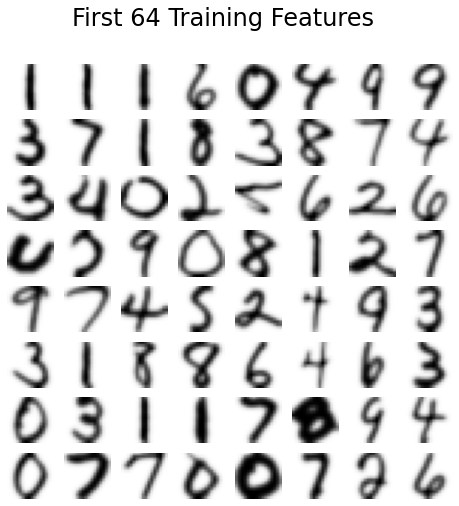

In [ ]:
# Plot some of the training and test sets 

def plot_digits(XX, N, title):
    """Small helper function to plot N**2 digits."""
    fig, ax = plt.subplots(N, N, figsize=(8, 8))
    for i in range(N):
      for j in range(N):
        ax[i,j].imshow(XX[(N)*i+j,:].reshape((16, 16)), cmap="Greys")
        ax[i,j].axis("off")
    fig.suptitle(title, fontsize=24)

plot_digits(X_train, 8, "First 64 Training Features" )

print(Y_train[0:8**2])

In [ ]:
print((X_train.mean()))

0.2597034322556729


In [ ]:
pca = PCA(n_components=256)
pca.fit(X_train)


PCA(n_components=256)

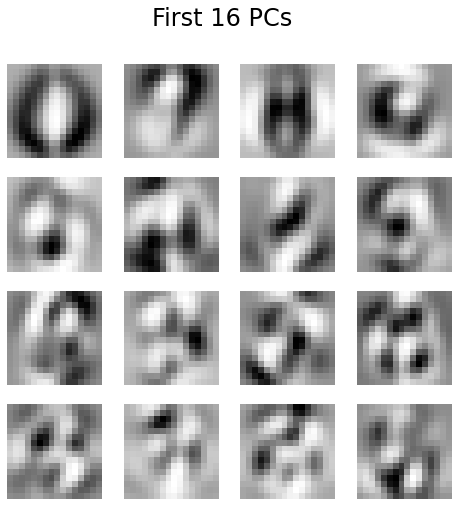

In [ ]:
plot_digits(pca.components_, 4, "First 16 PCs" )

In [ ]:
import plotly.graph_objs as go


fig = go.Figure(data=[go.Scatter(mode='markers',x=np.linspace(1, 256, 256),
    y=pca.explained_variance_ratio_)])


# tight layout
fig.update_layout(xaxis_title= "Principal Component", yaxis_title= "variance explained ratio",width=800, height=400)

fig.show()

In [ ]:
fig = go.Figure(data=[go.Scatter(mode='markers',x=np.linspace(1, 256, 256),
    y=100*np.sqrt(np.cumsum((pca.singular_values_)**2)/((pca.singular_values_)**2).sum()))])


# tight layout
fig.update_layout(xaxis_title= "Number of Principal Components", yaxis_title= "Fraction of Frobenius norm of X_train",width=900, height=500)

fig.show()


In [ ]:
pca3 = PCA(n_components=14)
pca3.fit(X_train)

(pca3.components_).shape

(14, 256)

1.9012569296705807e-18


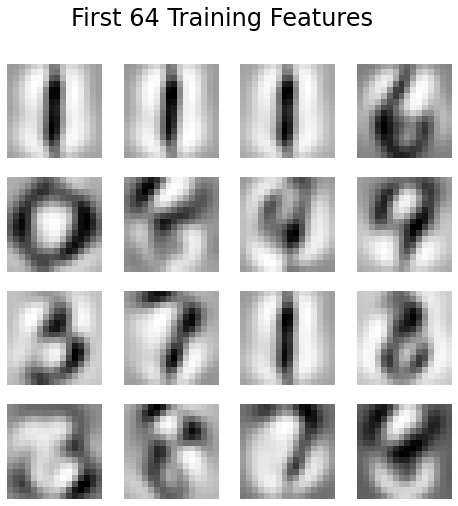

In [ ]:
X_tr18pc = pca3.transform(X_train)

X_bar = np.matmul(X_tr18pc,pca3.components_)
X_bar.shape

plot_digits(X_bar, 4, "First 64 Training Features" )
print((X_bar.mean()))

In [ ]:
X_train.shape

(2000, 256)

In [ ]:
centered_data = X_train - np.mean(X_train, axis=0)[None,:] 

dU, ds, dVt = np.linalg.svd(centered_data)

print(dU.shape, ds.shape, dVt.shape )

(2000, 2000) (256,) (256, 256)


In [ ]:
#fig = go.Figure(data=[go.Scatter(mode='markers',x=np.linspace(1, 256, 256),
#    y=ds**2/((ds**2).sum()))])

fig = go.Figure(data=[go.Scatter(mode='markers',x=np.linspace(1, 256, 256),
    y=ds)])

fig.add_trace(go.Scatter(mode='markers',x = np.linspace(1, 256, 256),
    y=pca.singular_values_, name="y position"))

#fig.update_yaxes(title_text="y-axis in logarithmic scale", type="log")


#fig.add_trace(go.Scatter(mode='markers',x = np.linspace(1, 256, 256),
#    y=pca.explained_variance_ratio_, name="y position"))


# tight layout
fig.update_layout(xaxis_title= "Component", yaxis_title= "Singular Values",width=800, height=400)

fig.show()

In [ ]:
fig = go.Figure(data=[go.Scatter(mode='markers',x=np.linspace(1, 256, 256),
    y=pca.singular_values_,name="singular values")])

#fig.add_trace(go.Scatter(mode='markers',x = np.linspace(1, 256, 256),
#    y=ds, name="y position"))

fig.add_trace(go.Scatter(mode='markers',x = np.linspace(1, 256, 256),
    y=(pca.explained_variance_), name="variance explained"))

fig.update_layout(xaxis_title= "x", yaxis_title= "y",width=800, height=400)
#fig.add_trace(go.Scatter(mode='markers',x = np.linspace(1, 256, 256),
#    y=(pca.explained_variance_ratio_)**2, name="y position"))

In [ ]:
def get_digit(Y_train, digit):
  Y_tr1 = np.where(Y_train == digit)
  return Y_tr1  

In [ ]:
pca16 = PCA(n_components=16)
pca16.fit(X_train)

PCA(n_components=16)

In [ ]:
pca16.explained_variance_.sum()

15.294496680146036

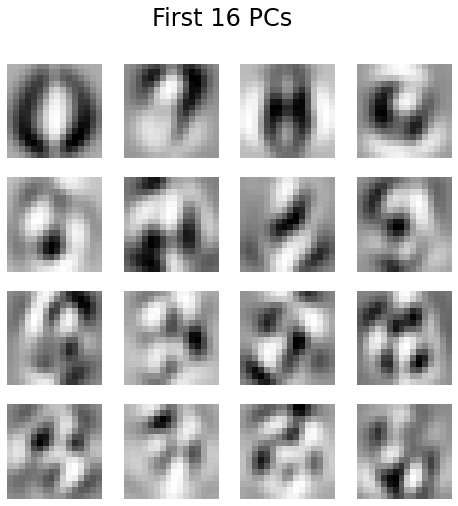

In [ ]:
plot_digits(pca16.components_, 4, "First 16 PCs" )

In [ ]:

Y_tr1 = get_digit(Y_train, 3.0)
X_tr1 = X_train[Y_tr1[0],:]
tr1_label = np.ones(Y_tr1[0].shape)*-1

Y_ts1 = get_digit(Y_test, 3.0)
X_ts1 = X_test[Y_ts1[0],:]
ts1_label = np.ones(Y_ts1[0].shape)*-1

Y_tr8 = get_digit(Y_train, 8.0)
X_tr8 = X_train[Y_tr8[0],:]
tr8_label = np.ones(Y_tr8[0].shape)*1

Y_ts8 = get_digit(Y_test, 8.0)
X_ts8 = X_test[Y_ts8[0],:]
ts8_label = np.ones(Y_ts8[0].shape)*1

In [ ]:
X_tr18 = np.concatenate((X_tr1, X_tr8), axis=0)
X_tr18.shape
X_ts18 = np.concatenate((X_ts1, X_ts8), axis=0)
X_ts18.shape

(72, 256)

In [ ]:
Y_tr18 = np.concatenate((tr1_label, tr8_label), axis=0)
Y_tr18.shape
Y_ts18 = np.concatenate((ts1_label, ts8_label), axis=0)


In [ ]:
X_tr18pc = pca16.transform(X_tr18)

X_tr18pc.shape

X_ts18pc = pca16.transform(X_ts18)

X_ts18pc.shape

(72, 16)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV




clf = Ridge(alpha=1.0)
clf.fit(X_tr18pc, Y_tr18)
#clf_hd = Ridge(alpha=1.0)
#clf_hd.fit(X_tr18, Y_tr18)





Ridge()

In [ ]:
#beta = np.insert(clf.coef_, 0, clf.intercept_)
mu = clf.predict(X_tr18pc)
#feats = np.insert(X_tr18pc,0,1,axis = 1)

#mu_hd = clf_hd.predict(X_tr18)

#mu = np.matmul(feats,beta)
((mu-Y_tr18)**2).sum()*1/mu.shape


array([0.18040806])

In [ ]:
mu = clf.predict(X_ts18pc)#np.matmul(X_ts18pc,clf.coef_)

#mu_hd = clf_hd.predict(X_ts18)

((mu-Y_ts18)**2).sum()*1/mu.shape

array([0.2581653])

In [ ]:
lambda_vals = 2**(np.linspace(-10,10,50))

In [ ]:
clfcv = RidgeCV(alphas=np.linspace(0.0001,10,100000),store_cv_values=True).fit(X_tr18pc, Y_tr18)
mucv = clfcv.predict(X_tr18pc)

((mucv-Y_tr18)**2).sum()*1/mucv.shape


array([0.181222])

In [ ]:
clfcv.alpha_

10.0

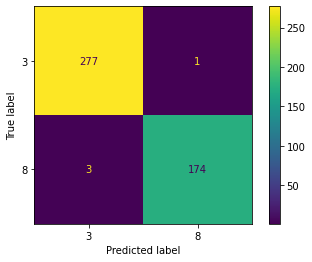

In [ ]:
mucv_sign = np.sign(mucv)
mucv_sign
from sklearn.metrics import confusion_matrix
y_true = Y_tr18
y_pred = mucv_sign
confusion_matrix(y_true, y_pred)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true, y_pred,display_labels=np.array([3,8]))

In [ ]:
clfcv.cv_values_.shape

(455, 100000)

In [ ]:
mucv = clfcv.predict(X_ts18pc)
mean_squared_error(mucv, Y_ts18)

0.0825847141445766

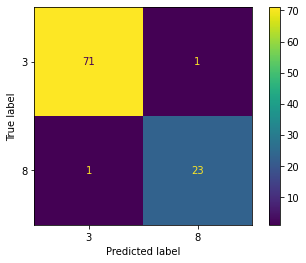

In [ ]:
mucv_sign = np.sign(mucv)
mucv_sign
from sklearn.metrics import confusion_matrix
y_true = Y_ts18
y_pred = mucv_sign
confusion_matrix(y_true, y_pred)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true, y_pred,display_labels=np.array([3,8]))

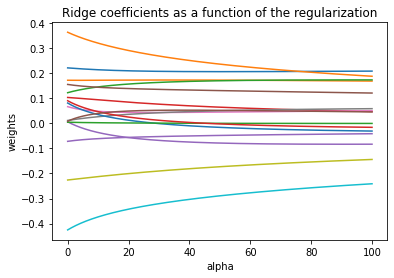

In [ ]:
n_alphas = 1000
alphas = np.linspace(0, 100, n_alphas)

coefs = []
perf_tr = []
perf_ts = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_tr18pc, Y_tr18)
    coefs.append(ridge.coef_)
    perf_tr.append(mean_squared_error(ridge.predict(X_tr18pc), Y_tr18))
    perf_ts.append(mean_squared_error(ridge.predict(X_ts18pc), Y_ts18))

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("linear")
ax.set_xlim(ax.get_xlim()) 
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

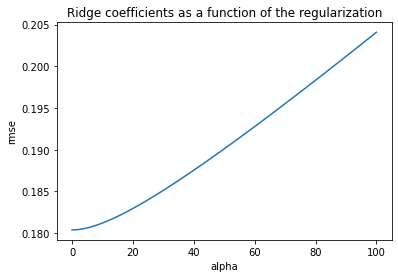

In [ ]:
ax2 = plt.gca()

ax2.plot(alphas, perf_tr)
ax2.set_xscale("linear")
ax2.set_xlim(ax.get_xlim()) 
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
ax2.plot(alphas, perf_ts)
plt.show()

In [ ]:
n_alphas = 1000
alphas = np.linspace(0, 100, n_alphas)

coefs_hd = []
perf_tr_hd = []
perf_ts_hd = []
for a in alphas:
    ridge_hd = Ridge(alpha=a)
    ridge_hd.fit(X_tr18, Y_tr18)
    coefs_hd.append(ridge_hd.coef_)
    perf_tr_hd.append(mean_squared_error(ridge_hd.predict(X_tr18), Y_tr18))
    perf_ts_hd.append(mean_squared_error(ridge_hd.predict(X_ts18), Y_ts18))

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs_hd)
ax.set_xscale("linear")
ax.set_xlim(ax.get_xlim()) 
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

KeyboardInterrupt: ignored

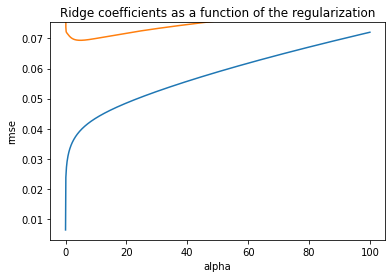

In [ ]:
ax2 = plt.gca()

ax2.plot(alphas, perf_tr_hd)
ax2.set_xscale("linear")
ax2.set_xlim(ax.get_xlim()) 
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
ax2.plot(alphas, perf_ts_hd)
plt.show()

In [ ]:
Y_tr1 = get_digit(Y_train, 1.0)
X_tr1 = X_train[Y_tr1[0],:]
tr1_label = np.ones(Y_tr1[0].shape)*-1

Y_ts1 = get_digit(Y_test, 1.0)
X_ts1 = X_test[Y_ts1[0],:]
ts1_label = np.ones(Y_ts1[0].shape)*-1

Y_tr8 = get_digit(Y_train, 8.0)
X_tr8 = X_train[Y_tr8[0],:]
tr8_label = np.ones(Y_tr8[0].shape)*1

Y_ts8 = get_digit(Y_test, 8.0)
X_ts8 = X_test[Y_ts8[0],:]
ts8_label = np.ones(Y_ts8[0].shape)*1

In [ ]:
pca3 = PCA(n_components=3)
pca3.fit(X_train)

(pca3.components_).shape

X_tr1pc = pca3.transform(X_tr1)
X_tr8pc = pca3.transform(X_tr8)

X_ts1pc = pca3.transform(X_ts1)
X_ts8pc = pca3.transform(X_ts8)

#X_bar = np.matmul(X_tr18pc,pca3.components_)
X_tr18pc.shape


(24, 3)

In [ ]:
fig = go.Figure(data=[go.Scatter3d(x=X_tr1pc[:,0], y=X_tr1pc[:,1], z=X_tr1pc[:,2],
                                   mode='markers',name="2s_train")])
fig.add_trace(go.Scatter3d(x=X_tr8pc[:,0], y=X_tr8pc[:,1], z=X_tr8pc[:,2],
                                   mode='markers',name="7s_train"))
fig.add_trace(go.Scatter3d(x=X_ts1pc[:,0], y=X_ts1pc[:,1], z=X_tr8pc[:,2],
                                   mode='markers',name="7s_test"))
fig.add_trace(go.Scatter3d(x=X_ts8pc[:,0], y=X_ts8pc[:,1], z=X_tr8pc[:,2],
                                   mode='markers',name="7s_test"))


fig.update_layout(scene = dict(xaxis_title= "pc1", yaxis_title= "pc2", zaxis_title="pc3"),width=800, height=800)
              
fig.show()